In [ ]:
import numpy as np
from grid_world import standard_grid,ACTION_SPACE

In [ ]:
eta=0.001 #Considered for converging condition

In [ ]:
def print_value(V,g):
  for i in range(g.rows):
    print("---------------")
    for j in range(g.cols):
      v=V.get((i,j),0)
      if v>=0:
        print("%.2f|"%v,end="")
      else:
        print(" %.2f|"%v,end="")
    print("")   

def print_policy(P,g):
  for i in range(g.rows):
    print("-----------------")
    for j in range(g.cols):
      a=P.get((i,j),' ')
      print('%s|'% a,end="")
    print("")  

def itr_policy_eval_deterministic():
  tranprob={}
  rewards={}
  grid=standard_grid()
  for i in range(grid.rows):
    for j in range(grid.cols):
      s=(i,j)
      if not grid.is_terminal(s):
        for a in ACTION_SPACE:
          s1=grid.get_next_state(s,a)
          tranprob[(s,a,s1)]=1
          if s1 in grid.rewards:
            rewards[(s,a,s1)]=grid.rewards[s1]


            

  pol = {
    (2, 0): 'U',
    (1, 0): 'U',
    (0, 0): 'R',
    (0, 1): 'R',
    (0, 2): 'R',
    (1, 2): 'U',
    (2, 1): 'R',
    (2, 2): 'U',
    (2, 3): 'L',
  }
  print_policy(pol, grid)
  V={}
  for s in grid.all_states():
    V[s]=0
  gamma=0.9
  it=0


  
  while True:
    bc=0
    for s in grid.all_states():
      if not grid.is_terminal(s):
        old_V=V[s]
        new_V=0
        for a in ACTION_SPACE:
          for s2 in grid.all_states():
            ac_prb=1 if pol.get(s)==a else 0
            r=rewards.get((s,a,s2),0)
            new_V+=ac_prb*tranprob.get((s,a,s2),0)*(r+gamma*V[s2])
        V[s]=new_V
        bc=max(bc,np.abs(old_V-V[s]))
    print("iter:", it, "biggest_change:", bc)
    print_value(V, grid)   
    it+=1
    # it-=1
    if bc<eta:
      break
  
print("\n") 


if __name__ == '__main__':
  itr_policy_eval_deterministic()













-----------------
R|R|R| |
-----------------
U| |U| |
-----------------
U|R|U|L|
iter: 0 biggest_change: 1.0
---------------
0.00|0.00|1.00|0.00|
---------------
0.00|0.00|0.00|0.00|
---------------
0.00|0.00|0.00|0.00|
iter: 1 biggest_change: 0.9
---------------
0.81|0.90|1.00|0.00|
---------------
0.73|0.00|0.90|0.00|
---------------
0.00|0.00|0.81|0.00|
iter: 2 biggest_change: 0.7290000000000001
---------------
0.81|0.90|1.00|0.00|
---------------
0.73|0.00|0.90|0.00|
---------------
0.66|0.73|0.81|0.73|
iter: 3 biggest_change: 0
---------------
0.81|0.90|1.00|0.00|
---------------
0.73|0.00|0.90|0.00|
---------------
0.66|0.73|0.81|0.73|


In [ ]:
#Windy grid world 
#iterative_policy_evaluation_probabilistic.py  code from lazy programmer

In [ ]:


import numpy as np
from grid_world import windy_grid, ACTION_SPACE

SMALL_ENOUGH = 1e-3 # threshold for convergence


def print_values(V, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")



if __name__ == '__main__':

  ### define transition probabilities and grid ###
  # the key is (s, a, s'), the value is the probability
  # that is, transition_probs[(s, a, s')] = p(s' | s, a)
  # any key NOT present will considered to be impossible (i.e. probability 0)
  # we can take this from the grid object and convert it to the format we want
  transition_probs = {}

  # to reduce the dimensionality of the dictionary, we'll use deterministic
  # rewards, r(s, a, s')
  # note: you could make it simpler by using r(s') since the reward doesn't
  # actually depend on (s, a)
  rewards = {}

  grid = windy_grid()
  for (s, a), v in grid.probs.items():
    for s2, p in v.items():
      transition_probs[(s, a, s2)] = p
      rewards[(s, a, s2)] = grid.rewards.get(s2, 0)

  ### probabilistic policy ###
  policy = {
    (2, 0): {'U': 0.5, 'R': 0.5},
    (1, 0): {'U': 1.0},
    (0, 0): {'R': 1.0},
    (0, 1): {'R': 1.0},
    (0, 2): {'R': 1.0},
    (1, 2): {'U': 1.0},
    (2, 1): {'R': 1.0},
    (2, 2): {'U': 1.0},
    (2, 3): {'L': 1.0},
  }
  print_policy(policy, grid)
  # print(transition_probs)
  # print(rewards)

  # initialize V(s) = 0
  V = {}
  for s in grid.all_states():
    V[s] = 0

  gamma = 0.9 # discount factor

  # repeat until convergence
  it = 0
  while True:
    biggest_change = 0
    for s in grid.all_states():
      if not grid.is_terminal(s):
        old_v = V[s]
        new_v = 0 # we will accumulate the answer
        for a in ACTION_SPACE:
          for s2 in grid.all_states():

            # action probability is deterministic
            action_prob = policy[s].get(a, 0)
            
            # reward is a function of (s, a, s'), 0 if not specified
            r = rewards.get((s, a, s2), 0)
            new_v += action_prob * transition_probs.get((s, a, s2), 0) * (r + gamma * V[s2])

        # after done getting the new value, update the value table
        V[s] = new_v
        biggest_change = max(biggest_change, np.abs(old_v - V[s]))

    print("iter:", it, "biggest_change:", biggest_change)
    print_values(V, grid)
    it += 1

    if biggest_change < SMALL_ENOUGH:
      break
  # print("V:", V)
  print("\n\n")


---------------------------
  {'R': 1.0}  |  {'R': 1.0}  |  {'R': 1.0}  |     |
---------------------------
  {'U': 1.0}  |     |  {'U': 1.0}  |     |
---------------------------
  {'U': 0.5, 'R': 0.5}  |  {'R': 1.0}  |  {'U': 1.0}  |  {'L': 1.0}  |
iter: 0 biggest_change: 1.0
---------------------------
 0.00| 0.00| 1.00| 0.00|
---------------------------
 0.00| 0.00|-0.50| 0.00|
---------------------------
 0.00| 0.00|-0.45| 0.00|
iter: 1 biggest_change: 0.9
---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00|-0.05| 0.00|
---------------------------
-0.18|-0.41|-0.04|-0.41|
iter: 2 biggest_change: 0.4920750000000001
---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00|-0.05| 0.00|
---------------------------
 0.31|-0.04|-0.04|-0.04|
iter: 3 biggest_change: 0
---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00|-0.05| 0.00|
---------------------------
 0.31|-0.04|-0

In [ ]:
#policy_iteration_deterministic.py reference from course on udemy by lazy programmer. 

In [ ]:

import numpy as np
from grid_world import standard_grid, ACTION_SPACE
# from iterative_policy_evaluation_deterministic import print_values, print_policy

SMALL_ENOUGH = 1e-3
GAMMA = 0.9


def print_values(V, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")


# copied from iterative_policy_evaluation
def get_transition_probs_and_rewards(grid):
  ### define transition probabilities and grid ###
  # the key is (s, a, s'), the value is the probability
  # that is, transition_probs[(s, a, s')] = p(s' | s, a)
  # any key NOT present will considered to be impossible (i.e. probability 0)
  transition_probs = {}

  # to reduce the dimensionality of the dictionary, we'll use deterministic
  # rewards, r(s, a, s')
  # note: you could make it simpler by using r(s') since the reward doesn't
  # actually depend on (s, a)
  rewards = {}

  for i in range(grid.rows):
    for j in range(grid.cols):
      s = (i, j)
      if not grid.is_terminal(s):
        for a in ACTION_SPACE:
          s2 = grid.get_next_state(s, a)
          transition_probs[(s, a, s2)] = 1
          if s2 in grid.rewards:
            rewards[(s, a, s2)] = grid.rewards[s2]

  return transition_probs, rewards


def evaluate_deterministic_policy(grid, policy):
  # initialize V(s) = 0
  V = {}
  for s in grid.all_states():
    V[s] = 0

  # repeat until convergence
  it = 0
  while True:
    biggest_change = 0
    for s in grid.all_states():
      if not grid.is_terminal(s):
        old_v = V[s]
        new_v = 0 # we will accumulate the answer
        for a in ACTION_SPACE:
          for s2 in grid.all_states():

            # action probability is deterministic
            action_prob = 1 if policy.get(s) == a else 0
            
            # reward is a function of (s, a, s'), 0 if not specified
            r = rewards.get((s, a, s2), 0)
            new_v += action_prob * transition_probs.get((s, a, s2), 0) * (r + GAMMA * V[s2])

        # after done getting the new value, update the value table
        V[s] = new_v
        biggest_change = max(biggest_change, np.abs(old_v - V[s]))
    it += 1

    if biggest_change < SMALL_ENOUGH:
      break
  return V


if __name__ == '__main__':

  grid = standard_grid()
  transition_probs, rewards = get_transition_probs_and_rewards(grid)

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  # we'll randomly choose an action and update as we learn
  policy = {}
  for s in grid.actions.keys():
    policy[s] = np.random.choice(ACTION_SPACE)

  # initial policy
  print("initial policy:")
  print_policy(policy, grid)

  # repeat until convergence - will break out when policy does not change
  while True:

    # policy evaluation step - we already know how to do this!
    V = evaluate_deterministic_policy(grid, policy)

    # policy improvement step
    is_policy_converged = True
    for s in grid.actions.keys():
      old_a = policy[s]
      new_a = None
      best_value = float('-inf')

      # loop through all possible actions to find the best current action
      for a in ACTION_SPACE:
        v = 0
        for s2 in grid.all_states():
          # reward is a function of (s, a, s'), 0 if not specified
          r = rewards.get((s, a, s2), 0)
          v += transition_probs.get((s, a, s2), 0) * (r + GAMMA * V[s2])

        if v > best_value:
          best_value = v
          new_a = a

      # new_a now represents the best action in this state
      policy[s] = new_a
      if new_a != old_a:
        is_policy_converged = False

    if is_policy_converged:
      break

  # once we're done, print the final policy and values
  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)

rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|
initial policy:
---------------------------
  R  |  R  |  U  |     |
---------------------------
  U  |     |  D  |     |
---------------------------
  D  |  D  |  R  |  D  |
values:
---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00| 0.90| 0.00|
---------------------------
 0.66| 0.73| 0.81| 0.73|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |


In [ ]:
# windy grid world policy_iteration_probabilistic.py

In [ ]:

import numpy as np
from grid_world import windy_grid, windy_grid_penalized, ACTION_SPACE
#from iterative_policy_evaluation import print_values, print_policy

SMALL_ENOUGH = 1e-3
GAMMA = 0.9


def print_values(V, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")

# copied from iterative_policy_evaluation
def get_transition_probs_and_rewards(grid):
  ### define transition probabilities and grid ###
  # the key is (s, a, s'), the value is the probability
  # that is, transition_probs[(s, a, s')] = p(s' | s, a)
  # any key NOT present will considered to be impossible (i.e. probability 0)
  transition_probs = {}

  # to reduce the dimensionality of the dictionary, we'll use deterministic
  # rewards, r(s, a, s')
  # note: you could make it simpler by using r(s') since the reward doesn't
  # actually depend on (s, a)
  rewards = {}

  for (s, a), v in grid.probs.items():
    for s2, p in v.items():
      transition_probs[(s, a, s2)] = p
      rewards[(s, a, s2)] = grid.rewards.get(s2, 0)

  return transition_probs, rewards


def evaluate_deterministic_policy(grid, policy):
  # initialize V(s) = 0
  V = {}
  for s in grid.all_states():
    V[s] = 0

  # repeat until convergence
  it = 0
  while True:
    biggest_change = 0
    for s in grid.all_states():
      if not grid.is_terminal(s):
        old_v = V[s]
        new_v = 0 # we will accumulate the answer
        for a in ACTION_SPACE:
          for s2 in grid.all_states():

            # action probability is deterministic
            action_prob = 1 if policy.get(s) == a else 0
            
            # reward is a function of (s, a, s'), 0 if not specified
            r = rewards.get((s, a, s2), 0)
            new_v += action_prob * transition_probs.get((s, a, s2), 0) * (r + GAMMA * V[s2])

        # after done getting the new value, update the value table
        V[s] = new_v
        biggest_change = max(biggest_change, np.abs(old_v - V[s]))
    it += 1

    if biggest_change < SMALL_ENOUGH:
      break
  return V


if __name__ == '__main__':

  grid = windy_grid_penalized(-0.2)
  # grid = windy_grid()
  transition_probs, rewards = get_transition_probs_and_rewards(grid)

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  # we'll randomly choose an action and update as we learn
  policy = {}
  for s in grid.actions.keys():
    policy[s] = np.random.choice(ACTION_SPACE)

  # initial policy
  print("initial policy:")
  print_policy(policy, grid)

  # repeat until convergence - will break out when policy does not change
  while True:

    # policy evaluation step - we already know how to do this!
    V = evaluate_deterministic_policy(grid, policy)

    # policy improvement step
    is_policy_converged = True
    for s in grid.actions.keys():
      old_a = policy[s]
      new_a = None
      best_value = float('-inf')

      # loop through all possible actions to find the best current action
      for a in ACTION_SPACE:
        v = 0
        for s2 in grid.all_states():
          # reward is a function of (s, a, s'), 0 if not specified
          r = rewards.get((s, a, s2), 0)
          v += transition_probs.get((s, a, s2), 0) * (r + GAMMA * V[s2])

        if v > best_value:
          best_value = v
          new_a = a

      # new_a now represents the best action in this state
      policy[s] = new_a
      if new_a != old_a:
        is_policy_converged = False

    if is_policy_converged:
      break

  # once we're done, print the final policy and values
  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)

rewards:
---------------------------
-0.20|-0.20|-0.20| 1.00|
---------------------------
-0.20| 0.00|-0.20|-1.00|
---------------------------
-0.20|-0.20|-0.20|-0.20|
initial policy:
---------------------------
  U  |  U  |  L  |     |
---------------------------
  U  |     |  R  |     |
---------------------------
  U  |  D  |  R  |  D  |
values:
---------------------------
 0.43| 0.70| 1.00| 0.00|
---------------------------
 0.19| 0.00|-0.15| 0.00|
---------------------------
-0.03|-0.23|-0.34|-0.50|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  L  |  U  |  L  |


In [ ]:
#value_iteration.py 

In [ ]:
import numpy as np
from grid_world import windy_grid, ACTION_SPACE
#from iterative_policy_evaluation import print_values, print_policy



def print_values(V, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")

SMALL_ENOUGH = 1e-3
GAMMA = 0.9

# copied from iterative_policy_evaluation
def get_transition_probs_and_rewards(grid):
  ### define transition probabilities and grid ###
  # the key is (s, a, s'), the value is the probability
  # that is, transition_probs[(s, a, s')] = p(s' | s, a)
  # any key NOT present will considered to be impossible (i.e. probability 0)
  transition_probs = {}

  # to reduce the dimensionality of the dictionary, we'll use deterministic
  # rewards, r(s, a, s')
  # note: you could make it simpler by using r(s') since the reward doesn't
  # actually depend on (s, a)
  rewards = {}

  for (s, a), v in grid.probs.items():
    for s2, p in v.items():
      transition_probs[(s, a, s2)] = p
      rewards[(s, a, s2)] = grid.rewards.get(s2, 0)

  return transition_probs, rewards

if __name__ == '__main__':
  grid = windy_grid()
  transition_probs, rewards = get_transition_probs_and_rewards(grid)

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # initialize V(s)
  V = {}
  states = grid.all_states()
  for s in states:
    V[s] = 0

  # repeat until convergence
  # V[s] = max[a]{ sum[s',r] { p(s',r|s,a)[r + gamma*V[s']] } }
  it = 0
  while True:
    biggest_change = 0
    for s in grid.all_states():
      if not grid.is_terminal(s):
        old_v = V[s]
        new_v = float('-inf')

        for a in ACTION_SPACE:
          v = 0
          for s2 in grid.all_states():
            # reward is a function of (s, a, s'), 0 if not specified
            r = rewards.get((s, a, s2), 0)
            v += transition_probs.get((s, a, s2), 0) * (r + GAMMA * V[s2])

          # keep v if it's better
          if v > new_v:
            new_v = v

        V[s] = new_v
        biggest_change = max(biggest_change, np.abs(old_v - V[s]))

    it += 1
    if biggest_change < SMALL_ENOUGH:
      break

  # find a policy that leads to optimal value function
  policy = {}
  for s in grid.actions.keys():
    best_a = None
    best_value = float('-inf')
    # loop through all possible actions to find the best current action
    for a in ACTION_SPACE:
      v = 0
      for s2 in grid.all_states():
        # reward is a function of (s, a, s'), 0 if not specified
        r = rewards.get((s, a, s2), 0)
        v += transition_probs.get((s, a, s2), 0) * (r + GAMMA * V[s2])

      # best_a is the action associated with best_value
      if v > best_value:
        best_value = v
        best_a = a
    policy[s] = best_a

  # our goal here is to verify that we get the same answer as with policy iteration
  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)

rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|
values:
---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00| 0.48| 0.00|
---------------------------
 0.66| 0.59| 0.53| 0.48|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  D  |     |
---------------------------
  U  |  L  |  L  |  L  |


In [ ]:
#monte_carlo.py 
#monte_carlo policy evaluation

In [ ]:

import numpy as np
from grid_world import standard_grid, negative_grid
#from iterative_policy_evaluation import print_values, print_policy

SMALL_ENOUGH = 1e-3
GAMMA = 0.9
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

# NOTE: this is only policy evaluation, not optimization

def print_values(V, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")

def play_game(grid, policy):
  # returns a list of states and corresponding returns

  # reset game to start at a random position
  # we need to do this, because given our current deterministic policy
  # we would never end up at certain states, but we still want to measure their value
  start_states = list(grid.actions.keys())
  start_idx = np.random.choice(len(start_states))
  grid.set_state(start_states[start_idx])

  s = grid.current_state()
  states_and_rewards = [(s, 0)] # list of tuples of (state, reward)
  while not grid.game_over():
    a = policy[s]
    r = grid.move(a)
    s = grid.current_state()
    states_and_rewards.append((s, r))
  # calculate the returns by working backwards from the terminal state
  G = 0
  states_and_returns = []
  first = True
  for s, r in reversed(states_and_rewards):
    # the value of the terminal state is 0 by definition
    # we should ignore the first state we encounter
    # and ignore the last G, which is meaningless since it doesn't correspond to any move
    if first:
      first = False
    else:
      states_and_returns.append((s, G))
    G = r + GAMMA*G
  states_and_returns.reverse() # we want it to be in order of state visited
  return states_and_returns


if __name__ == '__main__':
  # use the standard grid again (0 for every step) so that we can compare
  # to iterative policy evaluation
  grid = standard_grid()

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  policy = {
    (2, 0): 'U',
    (1, 0): 'U',
    (0, 0): 'R',
    (0, 1): 'R',
    (0, 2): 'R',
    (1, 2): 'R',
    (2, 1): 'R',
    (2, 2): 'R',
    (2, 3): 'U',
  }

  # initialize V(s) and returns
  V = {}
  returns = {} # dictionary of state -> list of returns we've received
  states = grid.all_states()
  for s in states:
    if s in grid.actions:
      returns[s] = []
    else:
      # terminal state or state we can't otherwise get to
      V[s] = 0

  # repeat
  for t in range(100):

    # generate an episode using pi
    states_and_returns = play_game(grid, policy)
    seen_states = set()
    for s, G in states_and_returns:
      # check if we have already seen s
      # called "first-visit" MC policy evaluation
      if s not in seen_states:
        returns[s].append(G)
        V[s] = np.mean(returns[s])
        seen_states.add(s)

  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)
  print(seen_states)


rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|
values:
---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00|-1.00| 0.00|
---------------------------
 0.66|-0.81|-0.90|-1.00|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  R  |     |
---------------------------
  U  |  R  |  R  |  U  |
{(1, 2)}


In [ ]:
#monte carlo windy grid world
#monte_carlo_random.py


In [ ]:

import numpy as np
from grid_world import standard_grid, negative_grid
#from iterative_policy_evaluation import print_values, print_policy

SMALL_ENOUGH = 1e-3
GAMMA = 0.9
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

# NOTE: this is only policy evaluation, not optimization

def print_values(V, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")

def random_action(a):
  # choose given a with probability 0.5
  # choose some other a' != a with probability 0.5/3
  p = np.random.random()
  if p < 0.5:
    return a
  else:
    tmp = list(ALL_POSSIBLE_ACTIONS)
    tmp.remove(a)
    return np.random.choice(tmp)

def play_game(grid, policy):
  # returns a list of states and corresponding returns

  # reset game to start at a random position
  # we need to do this, because given our current deterministic policy
  # we would never end up at certain states, but we still want to measure their value
  start_states = list(grid.actions.keys())
  start_idx = np.random.choice(len(start_states))
  grid.set_state(start_states[start_idx])

  s = grid.current_state()
  states_and_rewards = [(s, 0)] # list of tuples of (state, reward)
  while not grid.game_over():
    a = policy[s]
    a = random_action(a)
    r = grid.move(a)
    s = grid.current_state()
    states_and_rewards.append((s, r))
  # calculate the returns by working backwards from the terminal state
  G = 0
  states_and_returns = []
  first = True
  for s, r in reversed(states_and_rewards):
    # the value of the terminal state is 0 by definition
    # we should ignore the first state we encounter
    # and ignore the last G, which is meaningless since it doesn't correspond to any move
    if first:
      first = False
    else:
      states_and_returns.append((s, G))
    G = r + GAMMA*G
  states_and_returns.reverse() # we want it to be in order of state visited
  return states_and_returns


if __name__ == '__main__':
  # use the standard grid again (0 for every step) so that we can compare
  # to iterative policy evaluation
  grid = standard_grid()

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  # found by policy_iteration_random on standard_grid
  # MC method won't get exactly this, but should be close
  # values:
  # ---------------------------
  #  0.43|  0.56|  0.72|  0.00|
  # ---------------------------
  #  0.33|  0.00|  0.21|  0.00|
  # ---------------------------
  #  0.25|  0.18|  0.11| -0.17|
  # policy:
  # ---------------------------
  #   R  |   R  |   R  |      |
  # ---------------------------
  #   U  |      |   U  |      |
  # ---------------------------
  #   U  |   L  |   U  |   L  |
  policy = {
    (2, 0): 'U',
    (1, 0): 'U',
    (0, 0): 'R',
    (0, 1): 'R',
    (0, 2): 'R',
    (1, 2): 'U',
    (2, 1): 'L',
    (2, 2): 'U',
    (2, 3): 'L',
  }

  # initialize V(s) and returns
  V = {}
  returns = {} # dictionary of state -> list of returns we've received
  states = grid.all_states()
  for s in states:
    if s in grid.actions:
      returns[s] = []
    else:
      # terminal state or state we can't otherwise get to
      V[s] = 0

  # repeat until convergence
  for t in range(5000):

    # generate an episode using pi
    states_and_returns = play_game(grid, policy)
    seen_states = set()
    for s, G in states_and_returns:
      # check if we have already seen s
      # called "first-visit" MC policy evaluation
      if s not in seen_states:
        returns[s].append(G)
        V[s] = np.mean(returns[s])
        seen_states.add(s)

  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)

rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|
values:
---------------------------
 0.43| 0.56| 0.72| 0.00|
---------------------------
 0.32| 0.00| 0.18| 0.00|
---------------------------
 0.25| 0.18| 0.10|-0.14|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  L  |  U  |  L  |


In [ ]:
#Monte Carlo Control with exploring starts
#monte_carlo_es.py 
#with exploring strats


rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


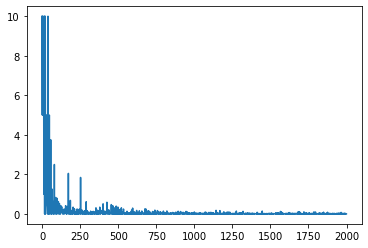

final policy:
---------------------------
  D  |  R  |  R  |     |
---------------------------
  D  |     |  U  |     |
---------------------------
  R  |  R  |  U  |  L  |
final values:
---------------------------
-1.01|-0.91| 1.00| 0.00|
---------------------------
-0.88| 0.00| 0.21| 0.00|
---------------------------
-0.73|-0.61|-0.08|-0.91|


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from grid_world import standard_grid, negative_grid
#from iterative_policy_evaluation import print_values, print_policy

GAMMA = 0.9
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')


def print_values(V, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")
# NOTE: this script implements the Monte Carlo Exploring-Starts method
#       for finding the optimal policy

def play_game(grid, policy):
  # returns a list of states and corresponding returns

  # reset game to start at a random position
  # we need to do this if we have a deterministic policy
  # we would never end up at certain states, but we still want to measure their value
  # this is called the "exploring starts" method
  start_states = list(grid.actions.keys())
  start_idx = np.random.choice(len(start_states))
  grid.set_state(start_states[start_idx])

  s = grid.current_state()
  a = np.random.choice(ALL_POSSIBLE_ACTIONS) # first action is uniformly random

  # be aware of the timing
  # each triple is s(t), a(t), r(t)
  # but r(t) results from taking action a(t-1) from s(t-1) and landing in s(t)
  states_actions_rewards = [(s, a, 0)]
  seen_states = set()
  seen_states.add(grid.current_state())
  num_steps = 0
  while True:
    r = grid.move(a)
    num_steps += 1
    s = grid.current_state()

    if s in seen_states:
      # hack so that we don't end up in an infinitely long episode
      # bumping into the wall repeatedly
      # if num_steps == 1 -> bumped into a wall and haven't moved anywhere
      #   reward = -10
      # else:
      #   reward = falls off by 1 / num_steps
      reward = -10. / num_steps
      states_actions_rewards.append((s, None, reward))
      break
    elif grid.game_over():
      states_actions_rewards.append((s, None, r))
      break
    else:
      a = policy[s]
      states_actions_rewards.append((s, a, r))
    seen_states.add(s)

  # calculate the returns by working backwards from the terminal state
  G = 0
  states_actions_returns = []
  first = True
  for s, a, r in reversed(states_actions_rewards):
    # the value of the terminal state is 0 by definition
    # we should ignore the first state we encounter
    # and ignore the last G, which is meaningless since it doesn't correspond to any move
    if first:
      first = False
    else:
      states_actions_returns.append((s, a, G))
    G = r + GAMMA*G
  states_actions_returns.reverse() # we want it to be in order of state visited
  return states_actions_returns


def max_dict(d):
  # returns the argmax (key) and max (value) from a dictionary
  # put this into a function since we are using it so often
  max_key = None
  max_val = float('-inf')
  for k, v in d.items():
    if v > max_val:
      max_val = v
      max_key = k
  return max_key, max_val


if __name__ == '__main__':
  # use the standard grid again (0 for every step) so that we can compare
  # to iterative policy evaluation
  # grid = standard_grid()
  # try the negative grid too, to see if agent will learn to go past the "bad spot"
  # in order to minimize number of steps
  # grid = negative_grid(step_cost=-0.9)
  grid=standard_grid()

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  # initialize a random policy
  policy = {}
  for s in grid.actions.keys():
    policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)

  # initialize Q(s,a) and returns
  Q = {}
  returns = {} # dictionary of state -> list of returns we've received
  states = grid.all_states()
  for s in states:
    if s in grid.actions: # not a terminal state
      Q[s] = {}
      for a in ALL_POSSIBLE_ACTIONS:
        Q[s][a] = 0 # needs to be initialized to something so we can argmax it
        returns[(s,a)] = []
    else:
      # terminal state or state we can't otherwise get to
      pass

  # repeat until convergence
  deltas = []
  for t in range(2000):
    if t % 100 == 0:
      print(t)

    # generate an episode using pi
    biggest_change = 0
    states_actions_returns = play_game(grid, policy)
    seen_state_action_pairs = set()
    for s, a, G in states_actions_returns:
      # check if we have already seen s
      # called "first-visit" MC policy evaluation
      sa = (s, a)
      if sa not in seen_state_action_pairs:
        old_q = Q[s][a]
        returns[sa].append(G)
        Q[s][a] = np.mean(returns[sa])
        biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))
        seen_state_action_pairs.add(sa)
    deltas.append(biggest_change)

    # update policy
    for s in policy.keys():
      policy[s] = max_dict(Q[s])[0]

  plt.plot(deltas)
  plt.show()

  print("final policy:")
  print_policy(policy, grid)

  # find V
  V = {}
  for s, Qs in Q.items():
    V[s] = max_dict(Q[s])[1]

  print("final values:")
  print_values(V, grid)

In [ ]:
#monte carlo control without exploring start

rewards:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|
0
1000
2000
3000
4000


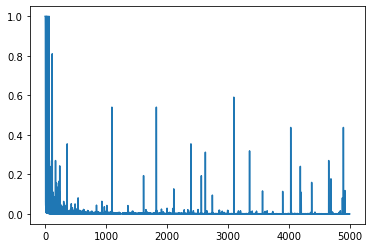

final values:
---------------------------
-0.33| 0.78| 1.00| 0.00|
---------------------------
 0.06| 0.00| 0.77| 0.00|
---------------------------
 0.22| 0.37| 0.54| 0.33|
final policy:
---------------------------
  D  |  R  |  R  |     |
---------------------------
  D  |     |  U  |     |
---------------------------
  R  |  R  |  U  |  L  |


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from grid_world import standard_grid, negative_grid
#from iterative_policy_evaluation import print_values, print_policy
#from monte_carlo_es import max_dict

GAMMA = 0.9
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

# NOTE: find optimal policy and value function
#       using on-policy first-visit MC

def random_action(a, eps=0.1):
  # choose given a with probability 1 - eps + eps/4
  # choose some other a' != a with probability eps/4
  p = np.random.random()
  # if p < (1 - eps + eps/len(ALL_POSSIBLE_ACTIONS)):
  #   return a
  # else:
  #   tmp = list(ALL_POSSIBLE_ACTIONS)
  #   tmp.remove(a)
  #   return np.random.choice(tmp)
  #
  # this is equivalent to the above
  if p < (1 - eps):
    return a
  else:
    return np.random.choice(ALL_POSSIBLE_ACTIONS)

def play_game(grid, policy):
  # returns a list of states and corresponding returns
  # in this version we will NOT use "exploring starts" method
  # instead we will explore using an epsilon-soft policy
  s = (2, 0)
  grid.set_state(s)
  a = random_action(policy[s])

  # be aware of the timing
  # each triple is s(t), a(t), r(t)
  # but r(t) results from taking action a(t-1) from s(t-1) and landing in s(t)
  states_actions_rewards = [(s, a, 0)]
  while True:
    r = grid.move(a)
    s = grid.current_state()
    if grid.game_over():
      states_actions_rewards.append((s, None, r))
      break
    else:
      a = random_action(policy[s]) # the next state is stochastic
      states_actions_rewards.append((s, a, r))

  # calculate the returns by working backwards from the terminal state
  G = 0
  states_actions_returns = []
  first = True
  for s, a, r in reversed(states_actions_rewards):
    # the value of the terminal state is 0 by definition
    # we should ignore the first state we encounter
    # and ignore the last G, which is meaningless since it doesn't correspond to any move
    if first:
      first = False
    else:
      states_actions_returns.append((s, a, G))
    G = r + GAMMA*G
  states_actions_returns.reverse() # we want it to be in order of state visited
  return states_actions_returns

def print_values(V, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")

def max_dict(d):
  # returns the argmax (key) and max (value) from a dictionary
  # put this into a function since we are using it so often
  max_key = None
  max_val = float('-inf')
  for k, v in d.items():
    if v > max_val:
      max_val = v
      max_key = k
  return max_key, max_val

if __name__ == '__main__':
  # use the standard grid again (0 for every step) so that we can compare
  # to iterative policy evaluation
  # grid = standard_grid()
  # try the negative grid too, to see if agent will learn to go past the "bad spot"
  # in order to minimize number of steps
  grid = negative_grid(step_cost=-0.1)

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  # initialize a random policy
  policy = {}
  for s in grid.actions.keys():
    policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)

  # initialize Q(s,a) and returns
  Q = {}
  returns = {} # dictionary of state -> list of returns we've received
  states = grid.all_states()
  for s in states:
    if s in grid.actions: # not a terminal state
      Q[s] = {}
      for a in ALL_POSSIBLE_ACTIONS:
        Q[s][a] = 0
        returns[(s,a)] = []
    else:
      # terminal state or state we can't otherwise get to
      pass

  # repeat until convergence
  deltas = []
  for t in range(5000):
    if t % 1000 == 0:
      print(t)

    # generate an episode using pi
    biggest_change = 0
    states_actions_returns = play_game(grid, policy)

    # calculate Q(s,a)
    seen_state_action_pairs = set()
    for s, a, G in states_actions_returns:
      # check if we have already seen s
      # called "first-visit" MC policy evaluation
      sa = (s, a)
      if sa not in seen_state_action_pairs:
        old_q = Q[s][a]
        returns[sa].append(G)
        Q[s][a] = np.mean(returns[sa])
        biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))
        seen_state_action_pairs.add(sa)
    deltas.append(biggest_change)

    # calculate new policy pi(s) = argmax[a]{ Q(s,a) }
    for s in policy.keys():
      a, _ = max_dict(Q[s])
      policy[s] = a

  plt.plot(deltas)
  plt.show()

  # find the optimal state-value function
  # V(s) = max[a]{ Q(s,a) }
  V = {}
  for s in policy.keys():
    V[s] = max_dict(Q[s])[1]

  print("final values:")
  print_values(V, grid)
  print("final policy:")
  print_policy(policy, grid)

In [ ]:
#td0_prediction.py
#TD(0) implementation

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from grid_world import standard_grid, negative_grid
#from iterative_policy_evaluation import print_values, print_policy

SMALL_ENOUGH = 1e-3
GAMMA = 0.9
ALPHA = 0.1
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

# NOTE: this is only policy evaluation, not optimization

def print_values(V, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  for i in range(g.rows):
    print("---------------------------")
    for j in range(g.cols):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")

def random_action(a, eps=0.1):
  # we'll use epsilon-soft to ensure all states are visited
  # what happens if you don't do this? i.e. eps=0
  p = np.random.random()
  if p < (1 - eps):
    return a
  else:
    return np.random.choice(ALL_POSSIBLE_ACTIONS)

def play_game(grid, policy):
  # returns a list of states and corresponding rewards (not returns as in MC)
  # start at the designated start state
  s = (2, 0)
  grid.set_state(s)
  states_and_rewards = [(s, 0)] # list of tuples of (state, reward)
  while not grid.game_over():
    a = policy[s]
    a = random_action(a)
    r = grid.move(a)
    s = grid.current_state()
    states_and_rewards.append((s, r))
  return states_and_rewards


if __name__ == '__main__':
  # use the standard grid again (0 for every step) so that we can compare
  # to iterative policy evaluation
  grid = standard_grid()

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  policy = {
    (2, 0): 'U',
    (1, 0): 'U',
    (0, 0): 'R',
    (0, 1): 'R',
    (0, 2): 'R',
    (1, 2): 'R',
    (2, 1): 'R',
    (2, 2): 'R',
    (2, 3): 'U',
  }

  # initialize V(s) and returns
  V = {}
  states = grid.all_states()
  for s in states:
    V[s] = 0

  # repeat until convergence
  for it in range(1000):

    # generate an episode using pi
    states_and_rewards = play_game(grid, policy)
    # the first (s, r) tuple is the state we start in and 0
    # (since we don't get a reward) for simply starting the game
    # the last (s, r) tuple is the terminal state and the final reward
    # the value for the terminal state is by definition 0, so we don't
    # care about updating it.
    for t in range(len(states_and_rewards) - 1):
      s, _ = states_and_rewards[t]
      s2, r = states_and_rewards[t+1]
      # we will update V(s) AS we experience the episode
      V[s] = V[s] + ALPHA*(r + GAMMA*V[s2] - V[s])

  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)

rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|
values:
---------------------------
 0.79| 0.88| 0.99| 0.00|
---------------------------
 0.70| 0.00|-0.90| 0.00|
---------------------------
 0.61|-0.36|-0.63|-0.88|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  R  |     |
---------------------------
  U  |  R  |  R  |  U  |
